In [1]:
#import libraries
import piplite
await piplite.install('seaborn')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-1-66dbfc91a49c>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#donwload dataframe to browser
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [3]:
#store data into dataframe
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
#load modul for linear regression
from sklearn.linear_model import LinearRegression

#create linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [5]:
#create a linear function - highway-mg (x) vs price (y)
X = df[['highway-mpg']]
Y = df[['price']]

#fit the linear model - using highway-mpg
lm.fit(X,Y)

#output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [9]:
#determine a value of intercept
lm.intercept_

array([38423.30585816])

In [6]:
#determine a value of slope
lm.coef_

array([[-821.73337832]])

In [7]:
#Question 1a
#Create a linier regression object called "lm1"

lm1 = LinearRegression()
lm1

LinearRegression()

In [8]:
#Question 1b
#Train the model - engine-size (x) vs price (y)

X = df[['engine-size']]
Y = df[['price']]

#fit the linear model - using highway-mpg
lm1.fit(X,Y)

#output a prediction
Yhat = lm1.predict(X)
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [10]:
#Question 1c
#Find the intercept
lm1.intercept_

array([-7963.33890628])

In [9]:
#Question 1c
#Find the slope
lm1.coef_

array([[166.86001569]])

In [17]:
#Question 1d
#What is the equation of the predicted line?

#using X and Y
Yhat = -7963.34 + 166.86*X

#using "engine-size" or "price"
price = -7963.34 + 166.86*df[['engine-size']]

In [37]:
#created multiple linear regression
#horsepower, curb-weight, engine-size, highway-mpg

#train the model - horsepower, curb-weight, engine-size, highway-mpg
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#fit the linear model
lm.fit(Z, df['price'])


LinearRegression()

In [38]:
#find the slope (coeficient)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [39]:
#find the intercept
lm.intercept_

-15806.62462632922

In [ ]:
#the equation of the predicted line?

#using X and Y
Yhat = -15806.62 + 53.49*X1 + 4.71*X2 + 81.53*X3 + 36.06*X4

#using "engine-size" or "price"
price = -15806.62 + 53.49*df[['horsepower']] + 4.71*df[['curb-weight']] + 81.53*df[['engine-size']] + 36.06*df[['highway-mpg']]

In [40]:
#Question 2a
#created multiple linear regression
#normalized-losses & highway-mpg

#build the model
lm2 = LinearRegression()

#fit the linear model
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


LinearRegression()

In [41]:
#find the slope (coeficient)
lm2.coef_

array([   1.49789586, -820.45434016])

In [42]:
#import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48171.18242703049)

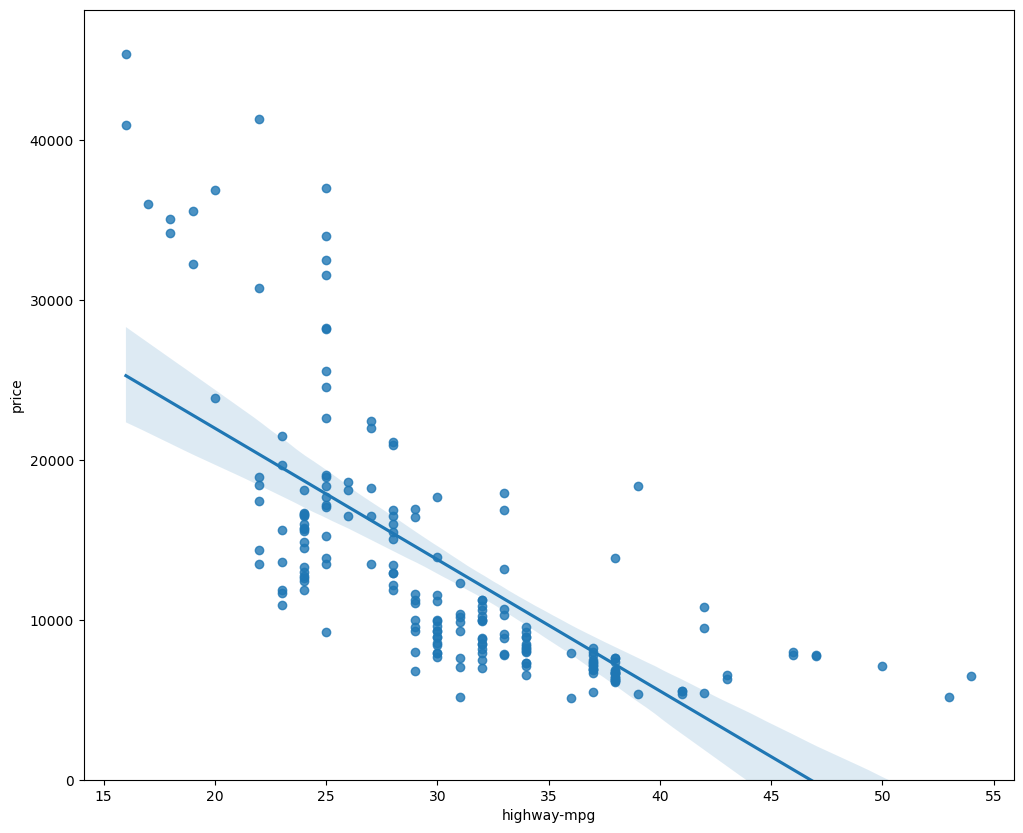

In [29]:
#visualize data with combination of scatterplot and linear regression
#highway-mpg vs price

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

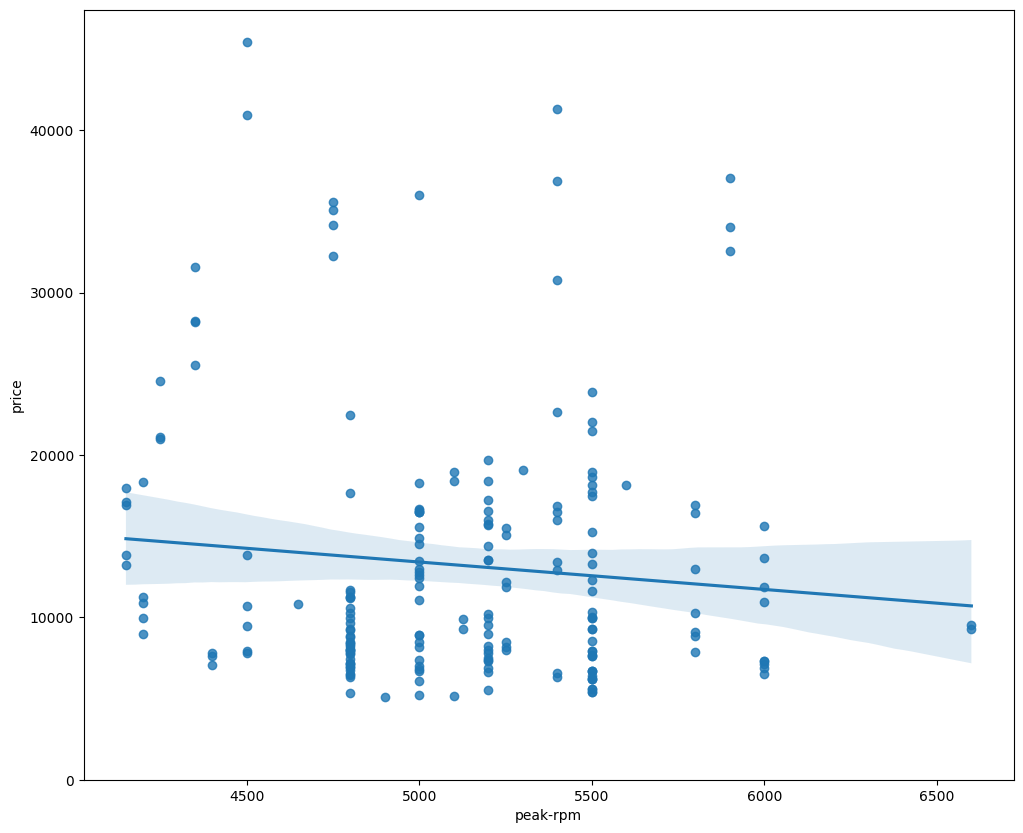

In [30]:
#visualize data with combination of scatterplot and linear regression
#peak-rpm vs price

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [31]:
#Question 3
#Which more strongly correlated with "price"?

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


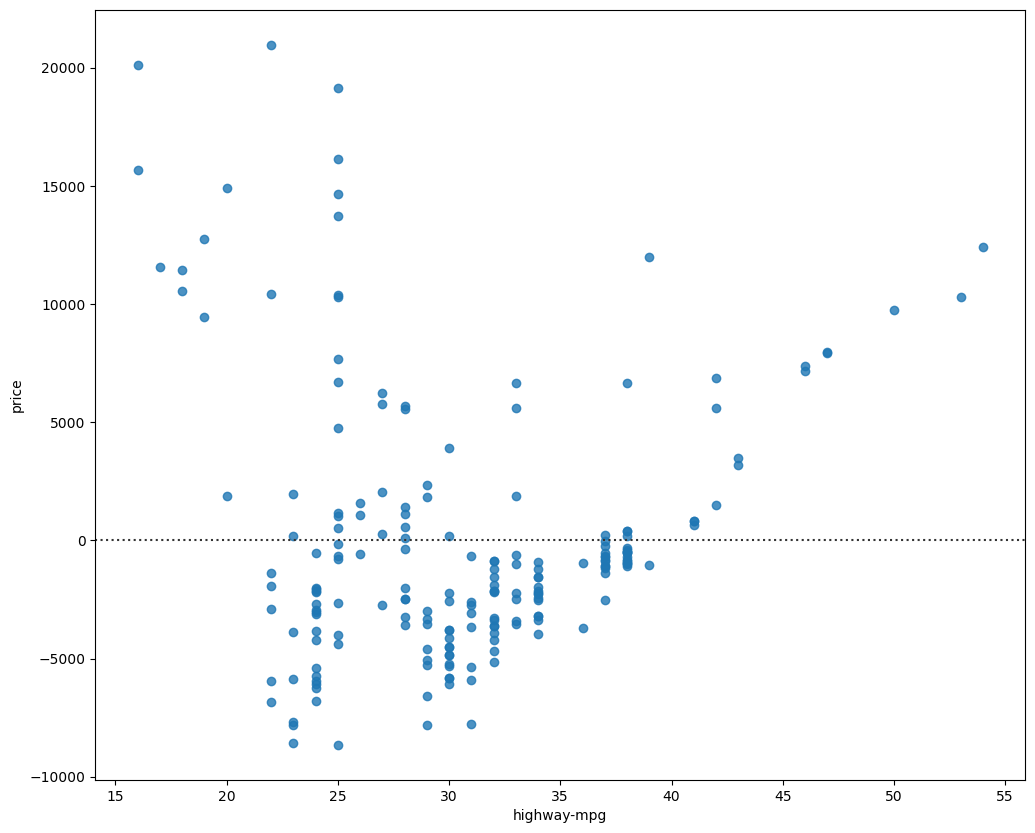

In [32]:
#residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<ipython-input-43-f5b8642bb95d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-43-f5b8642bb95d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

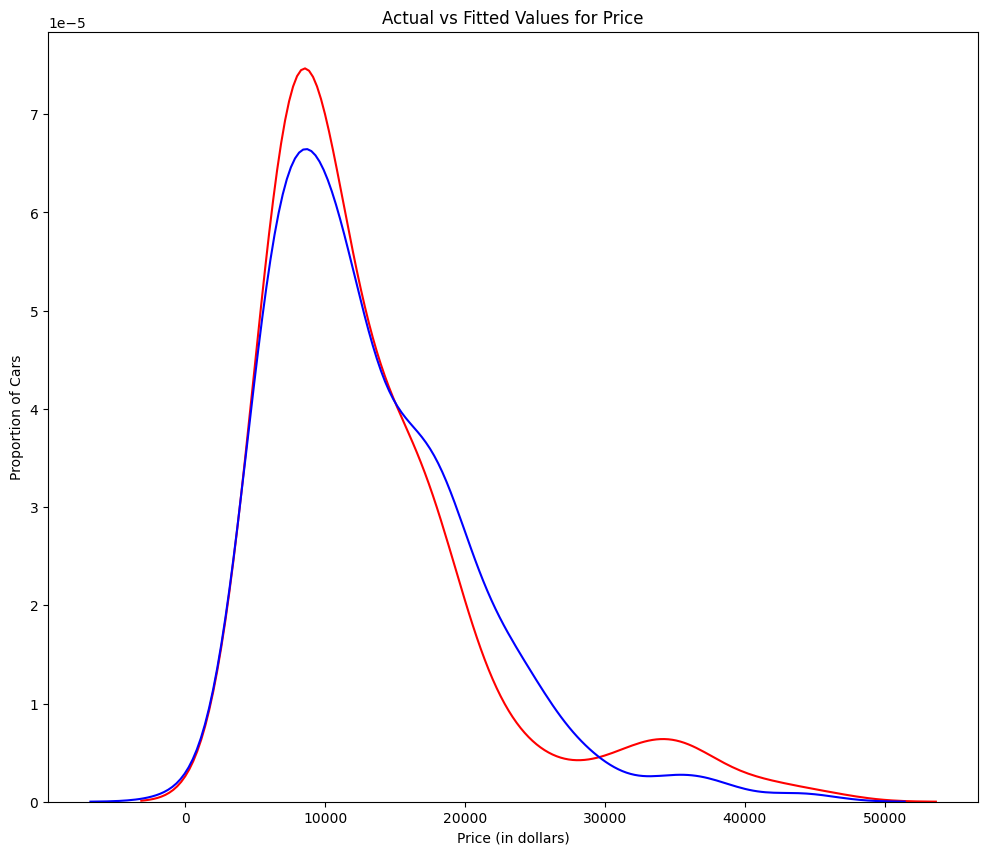

In [43]:
#multiple linier regression

Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [45]:
#polynomial regression
#highway vs price

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [46]:
#create a polynomial function
x = df['highway-mpg']
y = df['price']

#use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


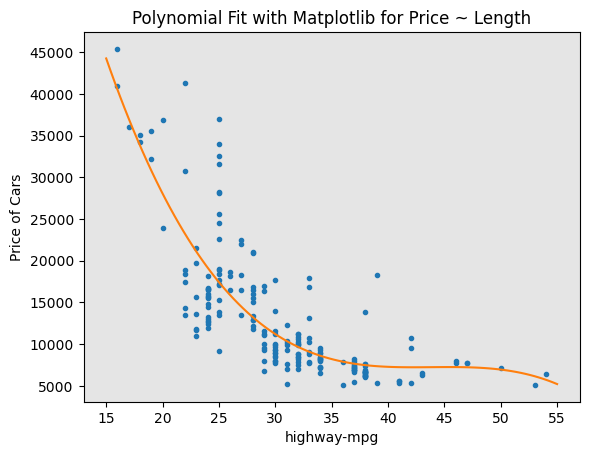

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [47]:
#plot the polynomial function
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


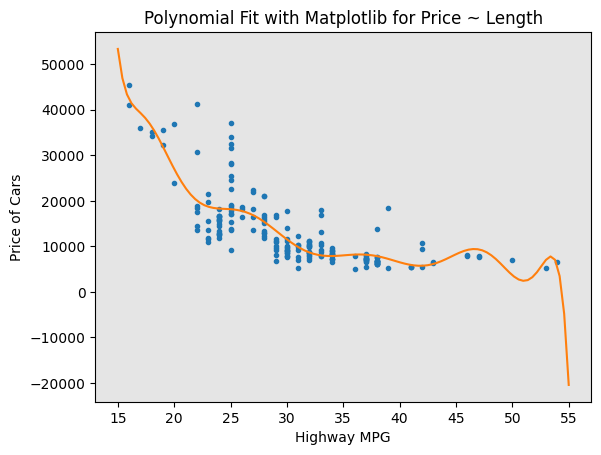

In [48]:
#Question 4
#Create 11 order polynomial model (cubic) with the variables x and y from above

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [49]:
#import the modul for Multivariate Polynomial
from sklearn.preprocessing import PolynomialFeatures

In [53]:
#create PolynomialFeatures(degree=2)
pr=PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [56]:
#check before transformation
Z_pr=pr.fit_transform(Z)
Z.shape

(201, 4)

In [57]:
#check after transformation
Z_pr.shape

(201, 15)

In [59]:
#data pipeline
#import pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
#create the pipeline by create a tuple
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [61]:
#input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
#convert data to float
#normalize the data, perform a transform and fit the model

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
#normalize the data, perform a transform and fit the model
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [65]:
#Question 5
#Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

#create pipeline
Input=[('scale',StandardScaler()),('model',LinearRegression())]

#input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)

#normalize the data, perform a transform and fit the model
Z = Z.astype(float)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]        

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [66]:
#calculate R2 from SLR

#highway-mpg vs price
lm.fit(X, Y)

#find R2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [67]:
#calculate MSE from SLR

#predict the output
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [68]:
#import funtion mean_squared_error (MSE)
from sklearn.metrics import mean_squared_error

#compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [69]:
#calculate R2 from MLR

#fit the model 
lm.fit(Z, df['price'])
#find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [71]:
#calculate MSE from MLR

#predict the output
Y_predict_multifit = lm.predict(Z)

#compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [72]:
#import function r2_score from the module metrics 
from sklearn.metrics import r2_score

In [73]:
#calculate R2 for polynomial fit
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [74]:
#calculate MSE for polynomial fit
mean_squared_error(df['price'], p(x))

20474146.426361218

In [75]:
#import pyploy for plotting
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [76]:
#create new input for predict method
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [77]:
#fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [78]:
#produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

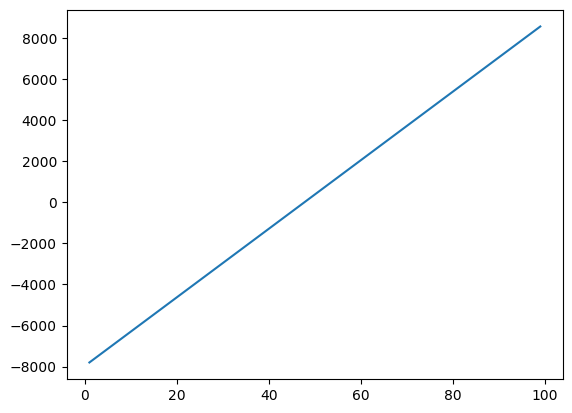

In [79]:
#plot the data
plt.plot(new_input, yhat)
plt.show()